# **Main Project**

# **About the Dataset**
The Secondary Mushroom Dataset is a simulated mushroom data collection designed for binary classification tasks—specifically, distinguishing between edible and poisonous mushrooms. It is as an extension to the original UCI Mushroom Dataset, offering a more extensive and diverse set of features to support advanced machine learning applications

# **Step 1: Acquire the dataset**
  
  Dataset link :https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

# **Step 2: Importing the necessary libraries**

To preprocess data using Python, it is essential to import predefined libraries, which are specifically designed to perform certain tasks.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# this step is modified as the project proceeds.

# **Step 3: Importing Datasets**

Import the datasets collected for the machine learning experiment to begin the analysis and model development process.

In [64]:
#Install the ucimlrepo package
!pip install ucimlrepo

In [65]:
from ucimlrepo import fetch_ucirepo
try:

# fetch dataset
    secondary_mushroom = fetch_ucirepo(id=848)
    print("Dataset imported successfully")
    X = secondary_mushroom.data.features
    y = secondary_mushroom.data.targets
except Exception as e :
    print("failed to import dataset \n Error: ",e)

Dataset imported successfully


In [66]:
print("\n Dataset Overview:")
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\n First 5 rows of features:")
print(X.head())
print("\n First 5 target values:")
print(y.head())


 Dataset Overview:
Features shape: (61069, 20)
Target shape: (61069, 1)

 First 5 rows of features:
   cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root  \
0               e          NaN          w        16.95       17.09         s   
1               e          NaN          w        17.99       18.19         s   
2               e          NaN          w        17.80       17.74         s   
3               e          NaN          w        15.77       15.98         s   
4               e          NaN          w        16.53       17.20

In [67]:
print('List of features and targets')
print(X.info())
print(y.info())

List of features and targets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   obj

# **Step 4: Finding Missing Data**


In [68]:
#checking for missing values
total_missing = X.isnull().sum().sum()
if total_missing == 0:
  print("\nNo missing values found in the feature set.")
else:
  print("\nMissing values found in the following features:")
  print(X.isnull().sum()[X.isnull().sum() > 0])


Missing values found in the following features:
cap-surface          14120
gill-attachment       9884
gill-spacing         25063
stem-root            51538
stem-surface         38124
veil-type            57892
veil-color           53656
ring-type             2471
spore-print-color    54715
dtype: int64


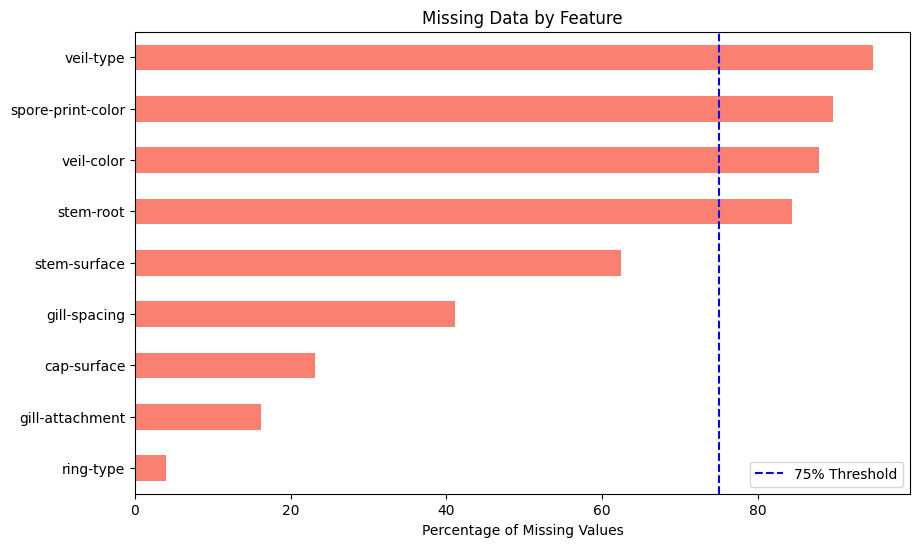

In [69]:
#Given the presence of missing values, consider visualizing the missingness
# Calculate % missing
missing_percent = (X.isnull().sum() / len(X)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
missing_percent.plot(kind='barh', color='salmon')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Data by Feature')
plt.gca().invert_yaxis()
#include the threshold line
plt.axvline(x=75, color='blue', linestyle='--', label='75% Threshold')
plt.legend()

plt.show()

Since some features have more than 80% missing data, we will drop them to ensure the quality and reliability of the analysis.

In [70]:
#listing and droping the features with missing data greater than 75%
for feat, percent in missing_percent.items():
    if percent >= 75:
        print(feat)


veil-type
spore-print-color
veil-color
stem-root


In [71]:
X_clean=X.drop(columns=missing_percent[missing_percent>=75].index)
X_clean.shape

(61069, 16)

In [72]:
X_clean.isnull().sum()

,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0
stem-width,0


Impute the remaining missing values appropriately using suitable techniques based on the nature of the data, such as mean, median, mode, or unknown

In [73]:
for feat, percent in missing_percent.items():
    if 75>=percent >0:
        print(feat,X_clean[feat].dtype)


stem-surface object
gill-spacing object
cap-surface object
gill-attachment object
ring-type object


In [74]:
#for these categorical columns filling them with unknown
X_clean['stem-surface'].fillna('unknown', inplace=True)
X_clean['gill-spacing'].fillna('unknown', inplace=True)
X_clean['cap-surface'].fillna('unknown', inplace=True)
X_clean['gill-attachment'].fillna('unknown', inplace=True)
X_clean['ring-type'].fillna('unknown', inplace=True)

<ipython-input-74-0b9d0e7f0d6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_clean['stem-surface'].fillna('unknown', inplace=True)
<ipython-input-74-0b9d0e7f0d6f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# **Step 5: Encoding**
Converting categorical data (text or labels) into a numeric format that machine learning models can understand.

In [75]:
print(X_clean.dtypes)
X_encoded = pd.get_dummies(X_clean, drop_first=True)
print(X_encoded.dtypes)

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-surface             object
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
dtype: object
cap-diameter    float64
stem-height     float64
stem-width      float64
cap-shape_c        bool
cap-shape_f        bool
                 ...   
habitat_u          bool
habitat_w          bool
season_s           bool
season_u           bool
season_w           bool
Length: 92, dtype: object


# **Step 6:Finding and Handling outliers**
Outliers are extreme values that can distort your model, reduce accuracy, and mislead analysis.Hence handling them properly is necessary

In [76]:
numeric_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = X_encoded[col].quantile(0.25)
    Q3 = X_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X_encoded[(X_encoded[col] < lower_bound) | (X_encoded[col] > upper_bound)]

    if not outliers.empty:
        print(f"{col} has {len(outliers)} outliers")


cap-diameter has 2400 outliers
stem-height has 3169 outliers
stem-width has 1967 outliers


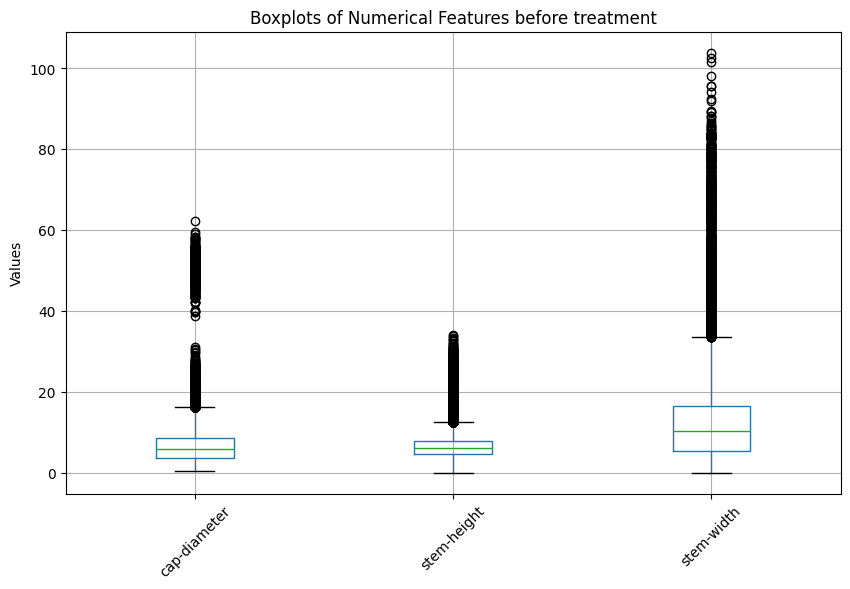

In [77]:
#plot of the outliers
features_to_plot = ['cap-diameter', 'stem-height', 'stem-width']

plt.figure(figsize=(10, 6))
X_encoded[features_to_plot].boxplot()
plt.title('Boxplots of Numerical Features before treatment')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [79]:
X_encoded[col] = X_encoded[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped successfully!")


Outliers capped successfully!


# **Step 7: Feature selection**
To find which columns (features) are most useful for predicting the target.

In [45]:
#introducing random forest classifier for feature selection
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

#finding the importance of each feature
importances = pd.Series(model.feature_importances_, index=X_encoded.columns)

#sorting and printing the features
importances = importances.sort_values(ascending=False)
print(importances)

#Higher score = more important feature.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


stem-width        0.087412
stem-height       0.064249
cap-diameter      0.060256
stem-color_w      0.034433
gill-spacing_d    0.029000
                    ...   
habitat_w         0.001262
stem-color_r      0.001259
stem-color_l      0.000735
habitat_p         0.000320
habitat_u         0.000306
Length: 92, dtype: float64


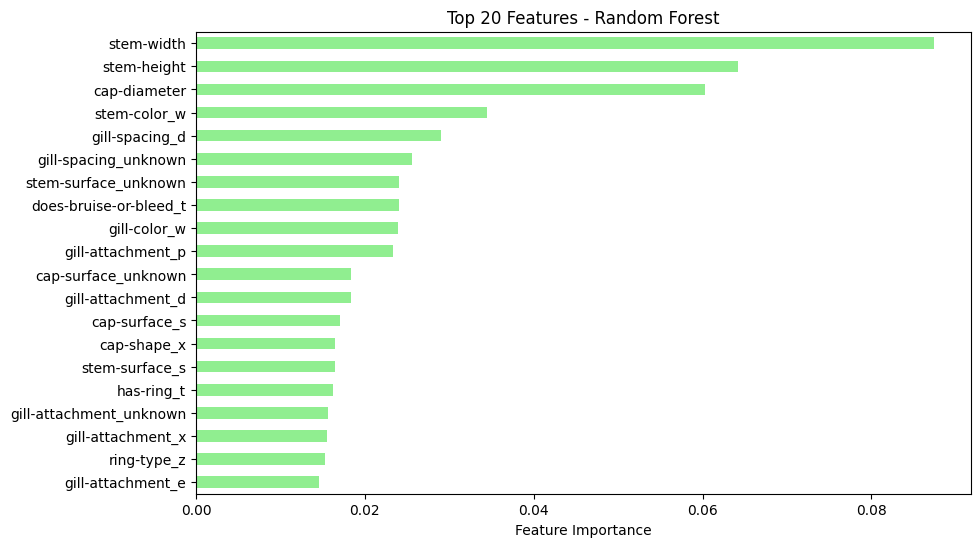

In [46]:
top_features = importances.head(20)

plt.figure(figsize=(10,6))
top_features.plot( kind='barh',color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 20 Features - Random Forest')
plt.show()

In [80]:
# making the dataframe with the top 15 features
selected_features = importances.head(15).index.tolist()
print(selected_features)
X_selected = X_encoded[selected_features]
#check
print(X_selected.shape)
#print(X_selected.head)

['stem-width', 'stem-height', 'cap-diameter', 'stem-color_w', 'gill-spacing_d', 'gill-spacing_unknown', 'stem-surface_unknown', 'does-bruise-or-bleed_t', 'gill-color_w', 'gill-attachment_p', 'cap-surface_unknown', 'gill-attachment_d', 'cap-surface_s', 'cap-shape_x', 'stem-surface_s']
(61069, 15)


# **Step 8: Splitting the dataset**
Splitting the dataset for training and testing



In [83]:
X_train,X_test,y_train,y_test= train_test_split(X_selected,y,test_size=0.2,random_state=42, stratify=y)
# stratify= y ensures the data is split in a balanced way

# **Step 9: Feature scaling**
To make all features have a similar range of values.

In [87]:
# Initializing scaler
scaler = StandardScaler()

# Fit and transform only on numerical columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])